# **Final Project Analysis Data with Python**: **Bike-Sharing Dataset**
- **Name:** Vincent Pangdipta
- **Email:** vincent17ede@gmail.com
- **Dicoding ID:** vincent_cnt

## **Business Questions**

- Which season has the highest number of rentals?
- How Workingdays compared to Holidays and Weekends, and what are the trends?
- How much weather affect rentals?
- What are the trends for both Casual Users and Registered Users?

## **Importing all libraries that needed**

In [1]:
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import  seaborn as sns
pd.options.display.max_columns = None

# **1. Data Wrangling**

## 1.1. Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Both files has the same columns except that hour.csv has hr (Hour) column, which we can use for analyzing data related to hour based time.

## 1.2. Assessing Data

In [4]:
print(f"Day_df shape: {day_df.shape}")
print(f"Hour_df shape: {hour_df.shape}")

Day_df shape: (731, 16)
Hour_df shape: (17379, 17)


In [5]:
print(f"Unique values in 'yr': {day_df['yr'].unique()}")

Unique values in 'yr': [0 1]


By the shape we could tell that there are 731 days recorded within the dataset which is 2 years as 1 of the years was a leap year. And there are 17.379 hours recorded, which if we divided by 24 we would get around 723 days. Considering there are days without any recorded hours due to circumstances like equipment failure or maintenance, those hours might be excluded.

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [9]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [10]:
print(f"Null Value day_df:\n{day_df.isna().sum()}\n")
print(f"Null Value hour_df:\n{hour_df.isna().sum()}\n")

Null Value day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Null Value hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



In [11]:
print(f"Duplicated day_df:\n{day_df.duplicated().sum()}\n")
print(f"Duplicated hour_df:\n{hour_df.duplicated().sum()}\n")

Duplicated day_df:
0

Duplicated hour_df:
0



There are no null values or duplicated values, which means that the dataset itself is already clean.

## 1.3. Cleaning Data



> Correcting `dteday` datatype



In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print(f"Data type of dteday in day_df: {day_df['dteday'].dtype}")
print(f"Data type of dteday in hour_df: {hour_df['dteday'].dtype}")


Data type of dteday in day_df: datetime64[ns]
Data type of dteday in hour_df: datetime64[ns]


As `dteday` is a date, we should change it's data type to datetime.






> Renaming Column Names



In [13]:
day_df.rename(columns={'yr':'Year',
                    'mnth':'Month',
                    'hum':'Humidity',
                    'weathersit':'Weather',
                    'cnt':'Count',
                    'dteday':'Datetime'
                    }, inplace=True)

day_df.columns = day_df.columns.str.title()

In [14]:
hour_df.rename(columns={'yr':'Year',
                    'mnth':'Month',
                    'hum':'Humidity',
                    'cnt':'Count',
                    'weathersit':'Weather',
                    'dteday':'Datetime',
                    'hr':'Hour'
                    }, inplace=True)

hour_df.columns = hour_df.columns.str.title()

The use of abbreviations should be avoided, as they can lead to confusion. Therefore, we change them to their actual names. Additionally, all column names have been modified to have an uppercase for the first character.



> Season's Value Mapping



In [15]:
print("Unique values in 'Season':", day_df['Season'].value_counts())

Unique values in 'Season': Season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


In [16]:
# Mapping according to dataset note
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['Season'] = day_df['Season'].map(season_mapping)




> Weather's Value Mapping



In [17]:
print("Unique values in 'Weather':", day_df['Weather'].value_counts())

Unique values in 'Weather': Weather
1    463
2    247
3     21
Name: count, dtype: int64


Informations regarding weather from the dataset note :    
- 1 : Clear, Few clouds, Partly cloudy, Partly cloudy  
- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Based on the informations, we could do mapping to make it easier to read!

In [18]:
weather_mapping = {1: 'Good', 2: 'Moderate', 3: 'Poor', 4: 'Severe'}
day_df['Weather'] = day_df['Weather'].map(weather_mapping)

To simplify the weather situation:  
1 → Good  
2 → Moderate  
3 → Poor  
4 → Severe



> Year's Value Mapping



In [19]:
print(f"Unique values in 'Year': {day_df['Year'].unique()}")

Unique values in 'Year': [0 1]


As 0 and 1 is not clear, we should mapping them to it's actual year.

In [20]:
# Mapping 0 to 2011 and 1 to 2012 according to dataset note
year_mapping = {0: 2011, 1: 2012}

day_df['Year'] = day_df['Year'].map(year_mapping)

print(f"Unique values in 'Year': {day_df['Year'].unique()}")

Unique values in 'Year': [2011 2012]


Now we could tell what year it is!

In [21]:
print(f"Unique values in 'Month': {day_df['Month'].unique()}")

Unique values in 'Month': [ 1  2  3  4  5  6  7  8  9 10 11 12]


Since each number already represents a month, we can leave them as they are.

 Now, we could see column names clearly. As the dataset itself is already clean (no null values neither duplicated values), we just need to make the data easy to read.


# **2. Exploratory Data Analysis (EDA)**

## 2.1. The Count of Rentals by Season

In [22]:
season_counts = day_df.groupby(by="Season").Count.sum().sort_values(ascending=False)
print(season_counts)

Season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: Count, dtype: int64


Here, we found that Fall was the season with the highest rentals and Spring has the lowest rentals.

## 2.2. Workingdays vs Weekends/Holidays

In [23]:
print("Unique values in 'Holiday':", day_df['Holiday'].value_counts(), "\n")
print("Unique values in 'Workingday':", day_df['Workingday'].value_counts())

Unique values in 'Holiday': Holiday
0    710
1     21
Name: count, dtype: int64 

Unique values in 'Workingday': Workingday
1    500
0    231
Name: count, dtype: int64


`Holiday` and `Workingday` have the same unique values, so we only need to use one. The dataset notes explain that 1 in `Workingday` means working day, and 0 means weekend or holiday. That’s why we will use `Workingday` column to check the differences.



> Lambda Expression for Workingday



In [24]:
# Using lambda expression to make the data easy to read when visualized
day_df['Workingday'] = day_df['Workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend/Holiday')

  As there are only two unique value, we could use lambda expression to transform data with boolean value (YES/NO).

In [25]:
day_type_counts = day_df.groupby(by="Workingday").Count.sum().sort_values(ascending=False)
print(day_type_counts)

Workingday
Working Day        2292410
Weekend/Holiday    1000269
Name: Count, dtype: int64


Now we know that Working Days have a higher number of rentals compared to Weekends/Holidays.

## 2.3. Rentals based on Weathers

In [26]:
weather_counts = day_df.groupby(by="Weather").Count.sum().sort_values(ascending=False)
print(weather_counts)

Weather
Good        2257952
Moderate     996858
Poor          37869
Name: Count, dtype: int64


There are no rentals being recorded when the weather is Severe.

## 2.4. Casual vs Registered

In [27]:
print(f"Total Casual Rentals: {day_df['Casual'].sum()}")
print(f"Total Registered Rentals: {day_df['Registered'].sum()}")

print(f"\nTotal Rentals: {day_df['Count'].sum()}")

Total Casual Rentals: 620017
Total Registered Rentals: 2672662

Total Rentals: 3292679


As expected, registered customers has higher rentals compared to casual customers.

# 3. Visualization & Explanatory Analysis

## Question 1: **Which season has the highest number of rentals?**

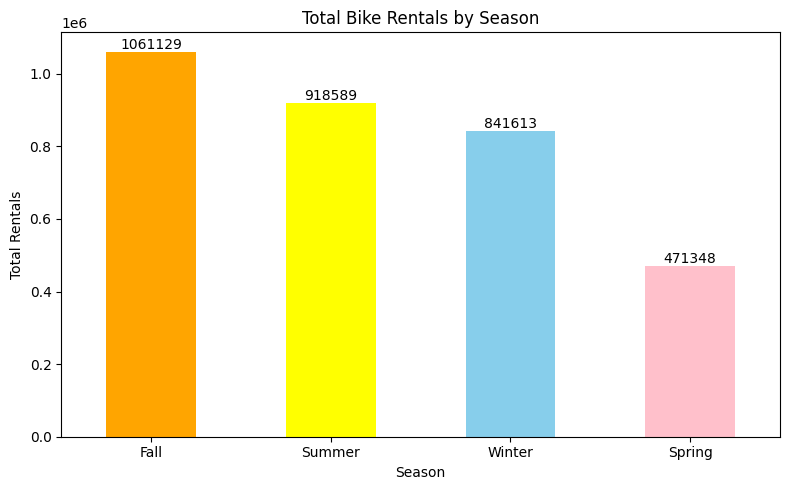

In [28]:
plt.figure(figsize=(8, 5))

# Colors mapping to match each season vibes
color_mapping = {
    'Spring': 'pink',
    'Summer': 'yellow',
    'Fall': 'orange',
    'Winter': 'skyblue'
}

season_counts = day_df.groupby(by="Season").Count.sum().sort_values(ascending=False)
colors = [color_mapping[season] for season in season_counts.index]
ax = season_counts.plot(kind='bar', color=colors)

# Total rentals on each bar
for i, count in enumerate(season_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(ticks=range(len(season_counts.index)), labels=season_counts.index, rotation=0)

plt.tight_layout()
plt.show()

From the chart Fall has the highest numbers of rentals, while Spring was the Season with lowest numbers on rentals.

## Question 2: **How Workingdays compared to Holidays and Weekends, and what are the trends?**

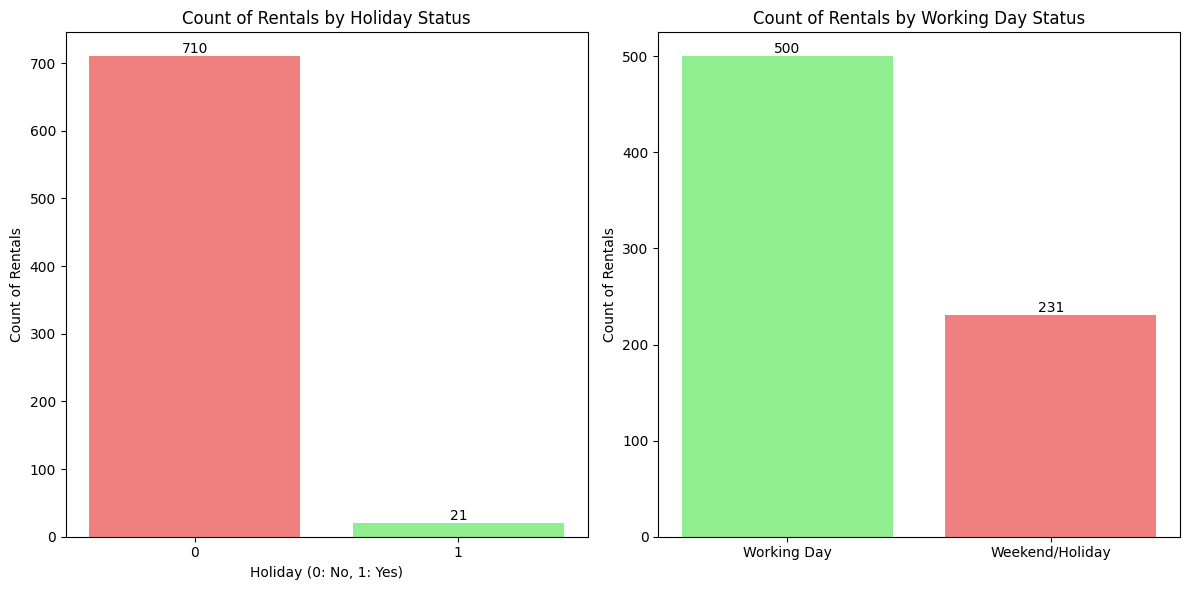

In [29]:
holiday_counts = day_df['Holiday'].value_counts()
workingday_counts = day_df['Workingday'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for Holiday
bars_holiday = ax[0].bar(holiday_counts.index.astype(str), holiday_counts.values, color=['lightcoral', 'lightgreen'])
ax[0].set_title('Count of Rentals by Holiday Status')
ax[0].set_xlabel('Holiday (0: No, 1: Yes)')
ax[0].set_ylabel('Count of Rentals')

# Annotations for Holiday bar chart
for bar in bars_holiday:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Bar chart for Workingday
bars_workingday = ax[1].bar(workingday_counts.index.astype(str), workingday_counts.values, color=['lightgreen', 'lightcoral'])
ax[1].set_title('Count of Rentals by Working Day Status')
ax[1].set_ylabel('Count of Rentals')

# Annotations for Workingday bar chart
for bar in bars_workingday:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

From the chart we got information that:  
- There were 500 bike-sharing rentals recorded on working days.
- There were 231 bike-sharing rentals recorded on weekend/holiday, where 21 being on holiday.



> Clustering by Working Day and Weekend/Holiday



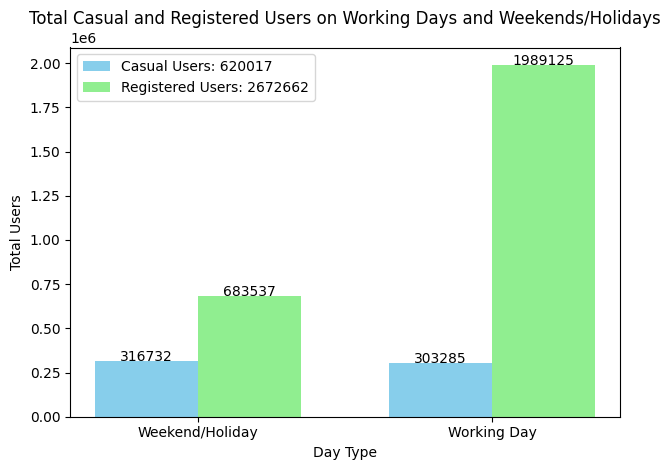

In [30]:
grouped_data = day_df.groupby('Workingday')[['Casual', 'Registered']].sum()

labels = ['Weekend/Holiday', 'Working Day']

casual_users = grouped_data['Casual']
registered_users = grouped_data['Registered']

x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35

ax.bar(x, casual_users, width=bar_width, color='skyblue', label=f'Casual Users: {casual_users.sum()}')
ax.bar([i + bar_width for i in x], registered_users, width=bar_width, color='lightgreen', label=f'Registered Users: {registered_users.sum()}')

ax.set_xlabel('Day Type')
ax.set_ylabel('Total Users')
ax.set_title('Total Casual and Registered Users on Working Days and Weekends/Holidays')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

for i, v in enumerate(casual_users):
    ax.text(i, v + 100, str(v), ha='center')

for i, v in enumerate(registered_users):
    ax.text(i + bar_width, v + 100, str(v), ha='center')

plt.tight_layout()
plt.show()


Information we got from the chart:
- Casual Users slightly prefer to rent during Weekend/Holiday.
- Registered Users prefer to rent during Working Day
- Overall, bike-sharing usage is higher on Working Day compared to Weekend/Holiday.



> Hourly Trends during Working Day and Weekend/Holiday



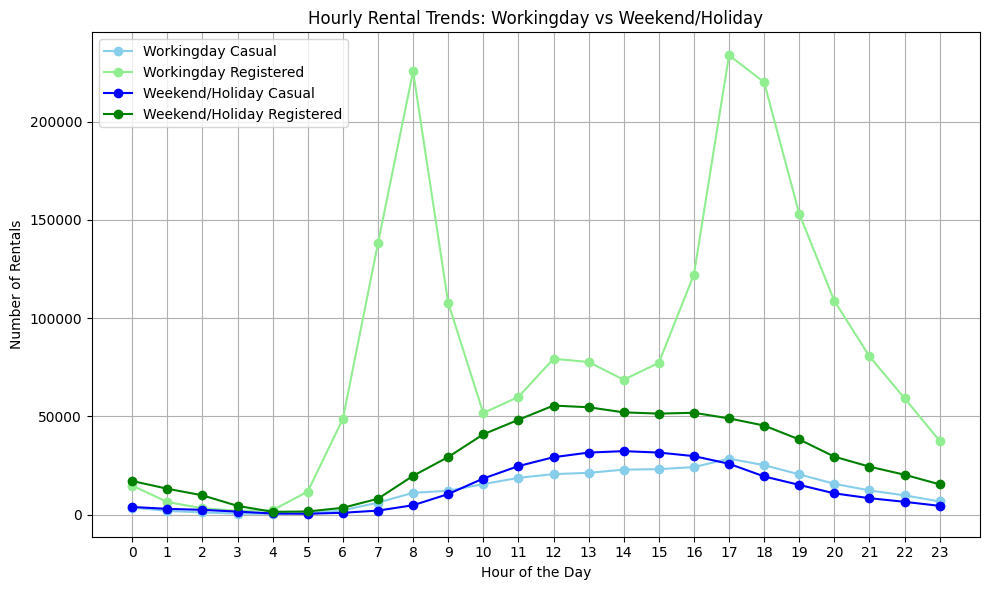

In [31]:
hourly_trend = hour_df.groupby(['Workingday', 'Hour'])[['Casual', 'Registered']].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

# Workingday rentals
ax.plot(hourly_trend[hourly_trend['Workingday'] == 1]['Hour'],
        hourly_trend[hourly_trend['Workingday'] == 1]['Casual'],
        label='Workingday Casual', color='skyblue', marker='o')

ax.plot(hourly_trend[hourly_trend['Workingday'] == 1]['Hour'],
        hourly_trend[hourly_trend['Workingday'] == 1]['Registered'],
        label='Workingday Registered', color='lightgreen', marker='o')

# Weekend/holiday rentals
ax.plot(hourly_trend[hourly_trend['Workingday'] == 0]['Hour'],
        hourly_trend[hourly_trend['Workingday'] == 0]['Casual'],
        label='Weekend/Holiday Casual', color='blue', marker='o')

ax.plot(hourly_trend[hourly_trend['Workingday'] == 0]['Hour'],
        hourly_trend[hourly_trend['Workingday'] == 0]['Registered'],
        label='Weekend/Holiday Registered', color='green', marker='o')

# Set x-ticks to show all hours from 0 to 23
ax.set_xticks(range(24))

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Rentals')
ax.set_title('Hourly Rental Trends: Workingday vs Weekend/Holiday')

ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

- From the trends, we can see that the peak hour for Workingday Registered rentals are at 17:00, followed by 18:00 and 08:00 respectively. By looking at the graph we could also interpreted that many people using bike-sharing services to commute during workingdays.  
  
- For Workingday Casual, Weekend/Holiday Casual and Registered rentals, all have similar patterns from 08:00-20:00. We can interpreted that bike-sharing services are popular during those hours as leisure activity.

## Question 3 : **How much weather affect rentals?**



> Clustering by Weather Situation



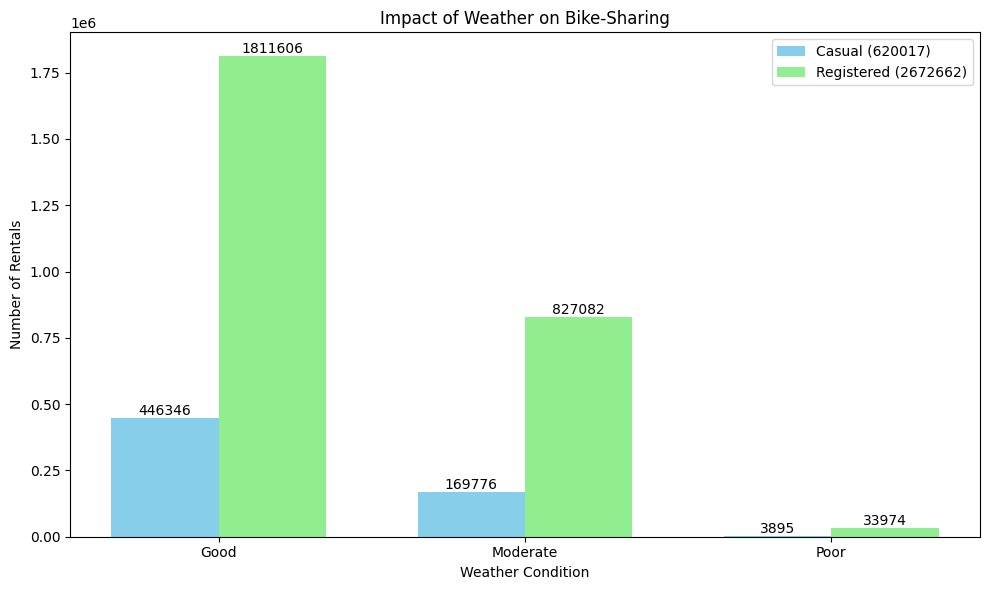

In [32]:
weather_trend = day_df.groupby('Weather')[['Casual', 'Registered']].sum().reset_index()

# Total rentals
total_casual = weather_trend['Casual'].sum()
total_registered = weather_trend['Registered'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Casual and Registered rentals
bar_width = 0.35
x = range(len(weather_trend['Weather']))

bar1 = ax.bar(x, weather_trend['Casual'], width=bar_width, label=f'Casual ({total_casual})', color='skyblue')
bar2 = ax.bar([p + bar_width for p in x], weather_trend['Registered'], width=bar_width, label=f'Registered ({total_registered})', color='lightgreen')

# Total rentals for each bar
for i in range(len(weather_trend)):
    ax.text(i, weather_trend['Casual'][i] + 5, weather_trend['Casual'][i], ha='center', va='bottom')
    ax.text(i + bar_width, weather_trend['Registered'][i] + 5, weather_trend['Registered'][i], ha='center', va='bottom')

ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(weather_trend['Weather'])
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Number of Rentals')
ax.set_title('Impact of Weather on Bike-Sharing')
ax.legend()

plt.tight_layout()
plt.show()

Based on the charts, we can conclude that weather significantly impacts bike-sharing rentals. More people tend to rent during Good Weather compared to Moderate Weather and Poor Weather. There were no rentals during Severe Weather.

## Question 4 : **What are the trends for both Casual Users and Registered Users?**



> Bike-Sharing Trends during 2011 & 2012



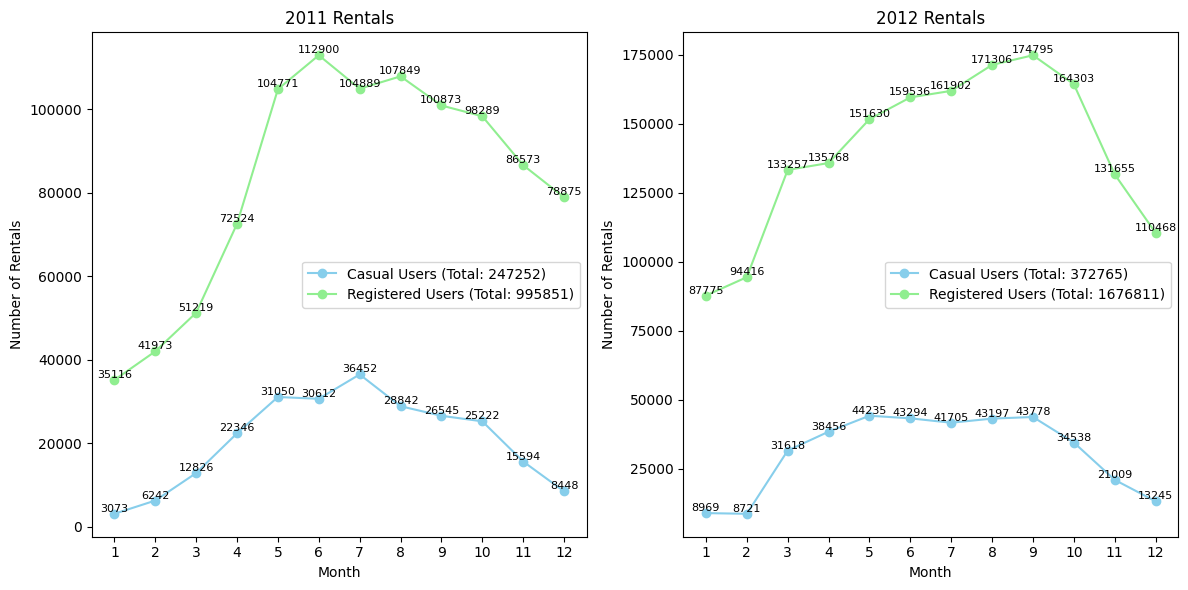

In [33]:
trend_data = day_df.groupby(['Year', 'Month'])[['Casual', 'Registered']].sum().reset_index()

# Total rentals for each casual and registered
total_casual_2011 = trend_data[trend_data['Year'] == 2011]['Casual'].sum()
total_registered_2011 = trend_data[trend_data['Year'] == 2011]['Registered'].sum()
total_casual_2012 = trend_data[trend_data['Year'] == 2012]['Casual'].sum()
total_registered_2012 = trend_data[trend_data['Year'] == 2012]['Registered'].sum()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 2011 Casual and Registered rentals
axs[0].plot(trend_data[trend_data['Year'] == 2011]['Month'],
            trend_data[trend_data['Year'] == 2011]['Casual'],
            marker='o', color='skyblue', label=f'Casual Users (Total: {total_casual_2011})')
axs[0].plot(trend_data[trend_data['Year'] == 2011]['Month'],
            trend_data[trend_data['Year'] == 2011]['Registered'],
            marker='o', color='lightgreen', label=f'Registered Users (Total: {total_registered_2011})')
axs[0].set_title('2011 Rentals')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Rentals')
axs[0].set_xticks(trend_data['Month'].unique())
axs[0].legend()

# Actual rentals for each month in 2011
for i in range(len(trend_data[trend_data['Year'] == 2011])):
    axs[0].text(trend_data[trend_data['Year'] == 2011]['Month'].iloc[i],
                trend_data[trend_data['Year'] == 2011]['Casual'].iloc[i],
                str(trend_data[trend_data['Year'] == 2011]['Casual'].iloc[i]),
                fontsize=8, ha='center', va='bottom')
    axs[0].text(trend_data[trend_data['Year'] == 2011]['Month'].iloc[i],
                trend_data[trend_data['Year'] == 2011]['Registered'].iloc[i],
                str(trend_data[trend_data['Year'] == 2011]['Registered'].iloc[i]),
                fontsize=8, ha='center', va='bottom')

# 2012 Casual and Registered rentals
axs[1].plot(trend_data[trend_data['Year'] == 2012]['Month'],
            trend_data[trend_data['Year'] == 2012]['Casual'],
            marker='o', color='skyblue', label=f'Casual Users (Total: {total_casual_2012})')
axs[1].plot(trend_data[trend_data['Year'] == 2012]['Month'],
            trend_data[trend_data['Year'] == 2012]['Registered'],
            marker='o', color='lightgreen', label=f'Registered Users (Total: {total_registered_2012})')
axs[1].set_title('2012 Rentals')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Rentals')
axs[1].set_xticks(trend_data['Month'].unique())
axs[1].legend()

# Actual rentals for each month in 2012
for i in range(len(trend_data[trend_data['Year'] == 2012])):
    axs[1].text(trend_data[trend_data['Year'] == 2012]['Month'].iloc[i],
                trend_data[trend_data['Year'] == 2012]['Casual'].iloc[i],
                str(trend_data[trend_data['Year'] == 2012]['Casual'].iloc[i]),
                fontsize=8, ha='center', va='bottom')
    axs[1].text(trend_data[trend_data['Year'] == 2012]['Month'].iloc[i],
                trend_data[trend_data['Year'] == 2012]['Registered'].iloc[i],
                str(trend_data[trend_data['Year'] == 2012]['Registered'].iloc[i]),
                fontsize=8, ha='center', va='bottom')

plt.tight_layout()
plt.show()

- **Spring** includes March (**3**), April (**4**), and May (**5**).
- **Summer** includes June (**6**), July (**7**), and August (**8**).
- **Fall** includes September (**9**), October (**10**), and November (**11**).
- **Winter** includes December (**12**), January (**1**), and February (**2**)



> Bike-Sharing Growth (2011-2012)



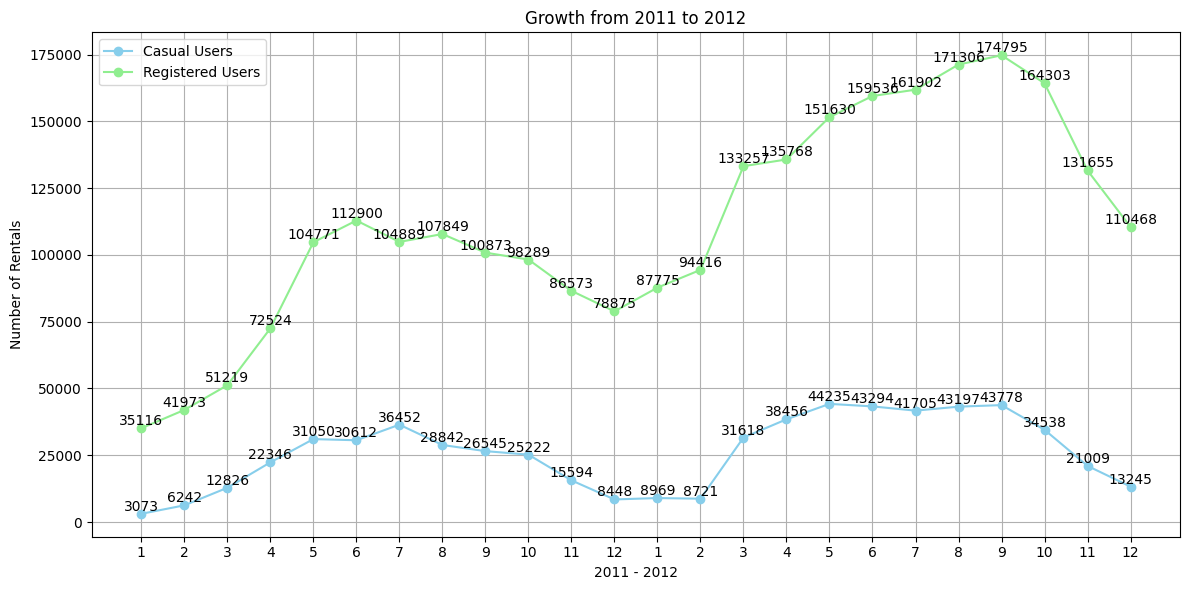

In [34]:
day_df['Datetime'] = pd.to_datetime(day_df['Datetime'])
hour_df['Datetime'] = pd.to_datetime(hour_df['Datetime'])

day_df['Month'] = day_df['Datetime'].dt.month  # Extract month
day_df['Year'] = day_df['Datetime'].dt.year    # Extract year
monthly_trend = day_df.groupby(['Year', 'Month'])[['Casual', 'Registered']].sum().reset_index()

# Create new labels for the x-axis
# We create a new column that combines the month values for both years (1-12 for 2011 and 1-12 for 2012)
monthly_trend['MonthLabel'] = monthly_trend['Month'].astype(str)  # Keep month numbers as strings

# Create a continuous list for the x-ticks (1-12 for 2011 followed by 1-12 for 2012)
month_ticks = monthly_trend['MonthLabel'].tolist()  # This will be [1, 2, ..., 12, 1, 2, ..., 12]

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting Casual rentals
ax.plot(monthly_trend.index,  # Use index for x-axis
        monthly_trend['Casual'],
        label='Casual Users', color='skyblue', marker='o')

# Plotting Registered rentals
ax.plot(monthly_trend.index,
        monthly_trend['Registered'],
        label='Registered Users', color='lightgreen', marker='o')

# Setting labels and title
ax.set_xlabel('2011 - 2012')
ax.set_ylabel('Number of Rentals')
ax.set_title('Growth from 2011 to 2012')

# Adjusting x-ticks to show only month numbers
ax.set_xticks(monthly_trend.index)
ax.set_xticklabels(month_ticks, rotation=0)  # Display just month numbers

# Displaying total rentals on each point
for i, (casual, registered) in enumerate(zip(monthly_trend['Casual'], monthly_trend['Registered'])):
    ax.text(i, casual, str(casual), ha='center', va='bottom')
    ax.text(i, registered, str(registered), ha='center', va='bottom')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Based on the charts, there is a significant increase for Registered Users from 2011 to 2012, while the growth in Casual Users is relatively small in comparison.

# Conclusion

**1. Which season has the highest number of rentals?**

> **Fall** was the Season that has the highest rentals throughout 2011-2012, while **Spring** was the Season with lowest rentals during the same period.



**2. How Workingdays compared to Holidays and Weekends, and what are the trends?**


> *   Throughout 2011-2012 there are 500 days where bike being rentals on Working Days and 210 on Weekends and 21 on Holidays  
> * Casual users slightly prefer to rent during Weekend/Holiday, while Registered Users prefer to rent during Working Day.
> *   On Hourly Trends; 17:00 was the peak hour for Workingday Registered rentals, followed by 18:00 and 08:00 respectively. We can interpreted that on this hours many people using bike-sharing services to commute during workingdays.  
>
>    As for Workingday Casual, Weekend/Holiday Casual and Registered rentals, all  
  have similar patterns from 08:00-20:00. We can interpreted that bike-sharing services are popular during those hours as leisure activity.












**3. How much weather affect rentals?**
> We can conclude that weather has significant impacts on bike-sharing rentals, as more users tend to rent during Good Weather compared to Moderate Weather and Poor Weather and there were no rentals during Severe Weather.





**4. What are the trends for both Casual Users and Registered Users?**

> There is a significant increase for Registered Users from 2011 to 2012, while the growth in Casual Users is relatively small in comparison.
>
>2011 Trends:
>- Registered Users; Bike-Sharing rentals started increasing significantly in April, with June being the peak, and gradually began to decline from August.
>- Casual Users; Bike-Sharing rentals started increasing significantly in April, with July being the peak, and gradually began to decline from August.
>
>2012 Trends:
>- Registered Users; Bike-Sharing rentals started increasing significantly in March, with September being the peak, and began to decline significantly in November.
>- Casual Users; Bike-Sharing rentals started increasing significantly in March, with May being the peak, and gradually began to decline from October. But throughout May to September, the number of rentals remained fairly consistent.




